# The homework of module 10: aproximatly for solve the line system

In [2]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

## exercise 1
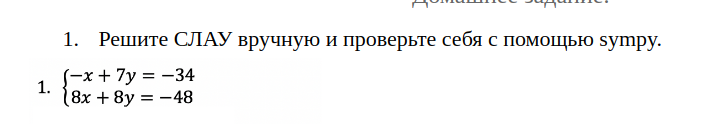

In [3]:
# solve manually the SLAE and check with hep to sympy 

In [5]:
x, y = symbols('x, y')

A = Matrix([[-1, 7], [8, 8]])
a = Matrix([x, y])
b = Matrix([-34, -48])

In [6]:
SLAE_1 = A*a - b
SLAE_1

[-x + 7*y + 34 ]
[              ]
[8*x + 8*y + 48]

In [7]:
linsolve(SLAE_1, [x, y])

## exercise 2
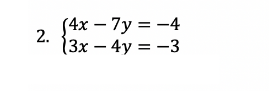

In [10]:
A = Matrix([[4, 7], [3, -4]])
a = Matrix([x, y])
b = Matrix([-4, -3])

In [11]:
SLAE_2 = A*a - b
SLAE_2

[4*x + 7*y + 4]
[             ]
[3*x - 4*y + 3]

In [12]:
linsolve(SLAE_2, [x, y])

## exercise 3
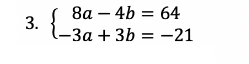

In [22]:
A = Matrix([[8, -4], [-3, 3]])
a, b = symbols('a, b')
c = Matrix([a, b])
d = Matrix([64, -21])

In [23]:
SLAE_3 = A * c - d 
SLAE_3

[8*a - 4*b - 64 ]
[               ]
[-3*a + 3*b + 21]

In [24]:
linsolve(SLAE_3, [a, b])

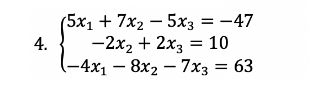

In [26]:
A = Matrix([[5, 7, -5], [0, -2, 2], [-4, -8, -7]])
x1, x2, x3 = symbols('x1, x2, x3')
a = Matrix([x1, x2, x3])
b = Matrix([-47, 10, 63])

In [27]:
SLAE_4 = A*a - b
SLAE_4

[5*x1 + 7*x2 - 5*x3 + 47 ]
[                        ]
[   -2*x2 + 2*x3 - 10    ]
[                        ]
[-4*x1 - 8*x2 - 7*x3 - 63]

In [28]:
(-188 + 315) / 5

In [29]:
linsolve(SLAE_4, [x1, x2, x3])

In [34]:
x2 = x3 - 5

In [35]:
5*x1 + 7*x2 - 5*x3 + 47

In [36]:
-4*x1 - 8*(x3 - 5) - 7*x3 - 63